<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[2차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○ 칼라 이미지를 gray 이미지로 변환하는 방법을 학습한다.<br>
○ gray 이미지를 binary 이미지로 변환하는 방법을 학습한다.
        </font></td></tr>   
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[2차시] 학습요약</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 칼라이미지를 gray 이미지로 변환하는 방법 
  - imread() 함수로 직접 변환하는 방법 
  - 칼라이미지로 읽은 후에 cvtColor() 함수로 변환하는 방법 

○ gray 이미지를 binary로 변환하는 방법 
  - threshold() 함수를 사용하는 방법  
  - OTSU 이진화 알고리즘을 사용하는 방법
  - adaptiveThreshold() 함수를 사용하는 방법
        
</font></td></tr>   
</table>

# Gray와 Binary 이미지 

- 시각은 색상정보에 대해 잘못된 정보를 보내주는 경우가 많음
  - 밤에 색상을 볼때 정확한 색상을 보여주지 못함 - 명도 (검정색이 섞이는 것)
  - 색상에 빛을 강하게 비추는 경우 정확한 색상을 보여주지 못함 - 채도 (흰색이 섞이는 것)
- 칼라는 너무 많은 정보를 가지고 있기때문에 연산량이 많음
  - 실시간 처리가 어려움
  - 따라서 gray 이미지나 binary 이미지로 변환해서 처리하는 것이 일반적
<br><br>  
- gray 이미지 : 0-255로 된 픽섹로만 구성된 흑백이미지
- binary(이진) 이미지 : 0(검정색)과 255(흰색)으로만 구성된 이미지 (마스크 패턴, 필터링)

<img src="./data/lecture_image/02_gray_binary.png" width=50%>


- 칼라 → gray 이미지 변환 방법 2가지
  - imread()로 이미지를 읽을 때 변환해서 읽는 방법
    -  img = cv2.imread(파일명, <font color=red>cv2.IMREAD_GRAYSCALE</font>)
  - 칼라 이미지로 읽어서 cvtColor() 변환하는 방법 → 칼라 이미지가 필요한 경우 (출력)
    -  img_gray = cv2.cvtColor(이미지객체, <font color=red>cv2.COLOR_BGR2GRAY</font>)
<br><br>    
- matplotlib 라이브러리의 colormap
  - 기본값 :  viridis
  
  <img src="./data/lecture_image/02_colormap.png" width=70%>

## gray 이미지  만들기

#### imread()를 사용해서 gray 이미지로 변환해서 읽는 방법 

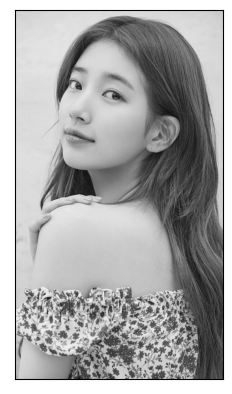

In [3]:
import cv2
import matplotlib.pyplot as plt

img_gray = cv2.imread("../OpenCV_data/image/suzy.jfif", cv2.IMREAD_GRAYSCALE)
plt.xticks([]), plt.yticks([])
plt.imshow(img_gray, cmap="gray")
plt.show()

#### color로 읽어서 gray로 변환하는 방법

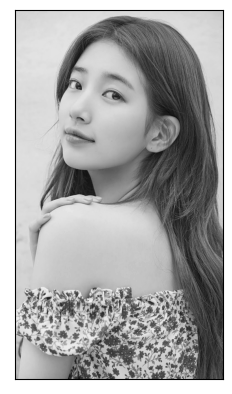

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../OpenCV_data/image/suzy.jfif", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.xticks([]), plt.yticks([])
plt.imshow(img_gray, cmap="gray")
plt.show()

## 이진 (Binary) 이미지 만들기

- 이진 이미지는 픽셀값이 0과 1(255)로만 구성
- 이진 이미지의 필요 : 배경과 객체의 구분, 관심영역과 비관심 영역의 구분, 마스크 생성 등


- <font color=red>_, thr = cv2.threshold(img, threshold_value, value, flag)</font>
  - img : Grayscale 이미지
  - threshold_value : 픽셀 문턱값 (0과 1로 나누기 위한 기준값)
  - value : 문턱값보다 클 때 적용되는 값
  - flag : 문턱값 적용 방법      

- flag : 문턱값 적용 방법
  - cv2.THRESH_BINARY : 픽셀값이 문턱값보다 크면 value, 아니면 0을 할당
  - cv2.THRESH_BINARY_INV : 픽셀값이 문턱값보다 크면 0, 아니면 value를 할당
  - cv2.THRESH_TRUNC : 픽셀값이 문턱값보다 크면 문턱값, 아니면 픽셀값을 그대로 할당
  - cv2.THRESH_TOZERO : 픽셀값이 문턱값보다 크면 픽셀값, 아니면 0을 할당
  - cv2.THRESH_TOZERO_INV : 픽셀값이 문턱값보다 크면 0, 아니면 픽셀값을 할당

- threshold의 단점
    - 기준값을 어떻게 설정할지 알 수 없다.
    - 여러 이미지의 기준값으 수동으로 잡아야하는 문제발생
    - 그래서 오츠알고리즘 등장!!!

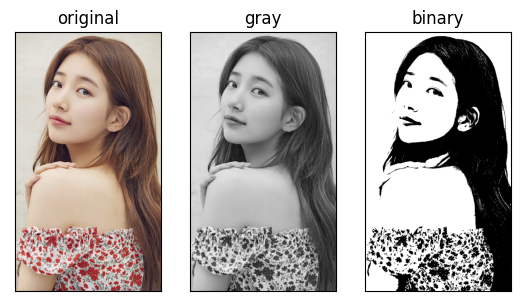

In [8]:
import cv2
import matplotlib.pyplot as plt

# 컬러 이미지 읽기
img = cv2.imread("../OpenCV_data/image/suzy.jfif", cv2.IMREAD_COLOR)
# 컬러 이미지 색상 채널 조정
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 흑백 이미지 변환
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진 이미지 변환
t, img_th = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

plt.subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.title("original")
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.title("gray")
plt.imshow(img_gray, cmap="gray")

plt.subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.title("binary")
plt.imshow(img_th, cmap="gray")

plt.show()

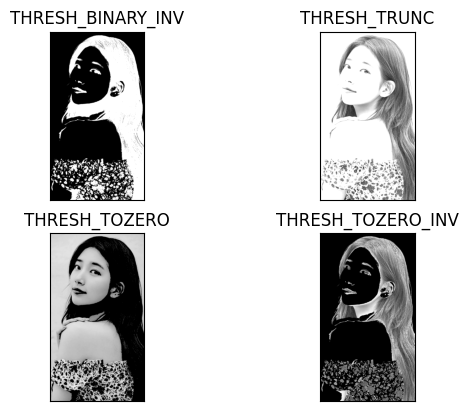

In [13]:
_, img_th1 = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY_INV)
_, img_th2 = cv2.threshold(img_gray, 128, 255, cv2.THRESH_TRUNC)
_, img_th3 = cv2.threshold(img_gray, 128, 255, cv2.THRESH_TOZERO)
_, img_th4 = cv2.threshold(img_gray, 128, 255, cv2.THRESH_TOZERO_INV)

plt.subplot(2, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title("THRESH_BINARY_INV")
plt.imshow(img_th1, cmap="gray")

plt.subplot(2, 2, 2)
plt.xticks([]), plt.yticks([])
plt.title("THRESH_TRUNC")
plt.imshow(img_th2, cmap="gray")

plt.subplot(2, 2, 3)
plt.xticks([]), plt.yticks([])
plt.title("THRESH_TOZERO")
plt.imshow(img_th3, cmap="gray")

plt.subplot(2, 2, 4)
plt.xticks([]), plt.yticks([])
plt.title("THRESH_TOZERO_INV")
plt.imshow(img_th4, cmap="gray")

plt.show()

## Binary 이미지의 임계값 결정

- threshold_value는 영상의 히스토그램에서 픽셀값들을 구분할 수 있는 값을 설정
  - 예를들어 아래와 같이 픽셀값들이 100과 150에 몰려 있으므로 130정도가 적당

  <img src="./data/lecture_image/02_binary.png" width=50%>

### 임계값 결정하기 1 : OTSU 알고리즘

- 이진 이미지를 만들때 가장 중요한 요소 : 임계값 설정
- OTSU의 이진화 알고리즘 : 최적의 임계값을 찾아 이진화를 적용해주는 알고리즘
  - 임계값을 임의로 정하고 픽셀을 두 분류로 나눔
  - 두 분류의 명암 분포를 구하는 작업을 반복
  - 두 분류의 명암 분포가 가장 균일할 때의 임계값을 선택
- OTSU의 이진화 알고리즘 적용하기
  - 임계값을 -1로하고 옵션을 THRESH_OTSU로 설정하여 이진화
- 단점 : 모든 경우의 수를 조사해야 하므로 속도가 느림

- 오츠의 문제점
    - 빛이 골고루 분포되어 있다면 잘 나오는데 그렇지 않은 경우 잘 나오지 않는다.
    - 그런 경우 영역을 나눠서 각각의 영역에서 오츠화한다

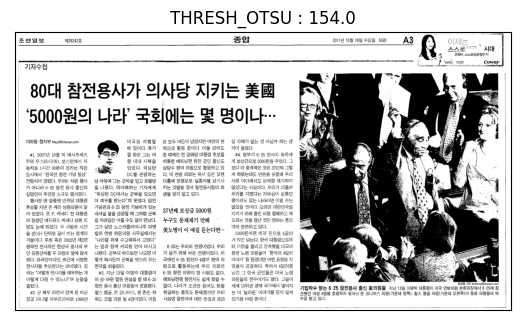

In [15]:
img_gray = cv2.imread("../OpenCV_data/image/news_paper.jpg", cv2.IMREAD_GRAYSCALE)

# t : otsu로 정한 임계값 (모든 픽셀을 검사해서 0과 255의 개수를 세고 두개의 수가 균등한 값을 임계값으로 설정한다.)
# -1은 파이썬에서 알아서 하라는 의미로 쓰임
t, img_th = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 

plt.xticks([]), plt.yticks([])
plt.title(f"THRESH_OTSU : {t}")
plt.imshow(img_th, cmap="gray")
plt.show()

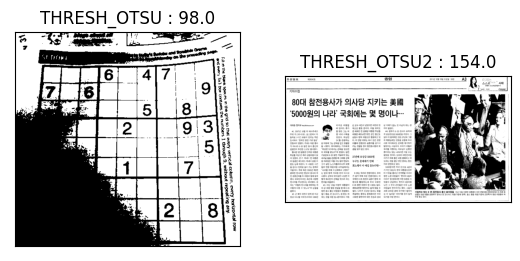

In [3]:
img_news = cv2.imread('../OpenCV_data/image/news_paper.jpg', cv2.IMREAD_GRAYSCALE)
img_sdo = cv2.imread('../OpenCV_data/image/sudoku.png', cv2.IMREAD_GRAYSCALE)

# t : otsu로 정한 임계값
t, img_th6 = cv2.threshold(img_sdo, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.title(f'THRESH_OTSU : {t}')
plt.imshow(img_th6, cmap='gray')

t, img_th7 = cv2.threshold(img_news, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.title(f'THRESH_OTSU2 : {t}')
plt.imshow(img_th7, cmap='gray')

### 임계값 결정하기 2 : 적응형 thresholding

- 전체 이미지를 이용하면 일정하지 않는 조명, 배경색이 여러개인 경우 하나의 임계값으로 선명한 이진 이미지를 만들기 어려움
- 적응형 thresholding
  - 이미지를 여러 영역으로 나눔
  - 해당 영역의 픽셀 값만 활용하여 임계값을 계산
  - 각 영역별로 이진화를 진행
  
   <img src="./data/lecture_image/02_adaptive_threshold.PNG" width=30%></td></tr> 

<br>

- <font color=red>cv2.adaptiveThreshold(img, value, method, type_flag, block_size, C)</font>
  - img : 입력영상
  - value : 임계값을 만족하는 픽셀에 적용할 값
  - method : 임계값 결정 방법
  - cv2.ADAPTIVE_THRESH_MEAN_C : 이웃 픽셀의 평균으로 결정
  - cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 가우시안 분포에 따른 가중치의 합으로 결정
  - type_flag : 스레시홀딩 적용 방법 (cv2.threshod()와 동일)
  - block_size : 영역으로 나눌 블록의 크기(n x n), (반드시 홀수)
  - C : 계산된 임계값 결과에서 가감할 상수(음수 가능)

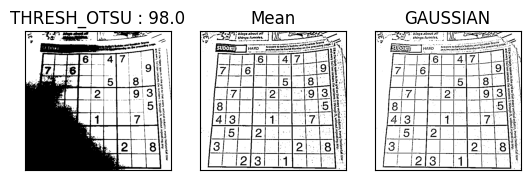

In [17]:
img_gray = cv2.imread("../OpenCV_data/image/sudoku.png", cv2.IMREAD_GRAYSCALE)

# t : ostu로 정한 임계값
t, img_th = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 9 x 9
block_size = 9
# 결과값에서 빼는 값
C = 5

# 적응형 Threshold : Mean 
# 장점 : 또렸하다
# 단점 : 솔트 잡음이 조금 있음
img_th2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, block_size, C)

# 적응형 Threshold : Gaussian
# 장점 : 솔트 잡음이 없음
# 단점 : 조금 흐릿하다
img_th3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, block_size, C)

plt.subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.title(f"THRESH_OTSU : {t}")
plt.imshow(img_th, cmap="gray")

plt.subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.title("Mean")
plt.imshow(img_th2, cmap="gray")

plt.subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.title("GAUSSIAN")
plt.imshow(img_th3, cmap="gray")

plt.show()

- 실행 결과
  - THRESH_OTSU : 분류가 잘 되지 않음
  - ADAPTIVE_THRESH_MEAN_C : 선명하지만 잡음이 많음
  - ADAPTIVE_THRESH_GAUSSIAN_C : 잡음은 적지만 선명도가 떨어짐

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다른 이미지를 아래와 같이 이진이미지로 변환해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./data/lecture_image/02_threshold2.png" width=70%></td></tr>   
</table>

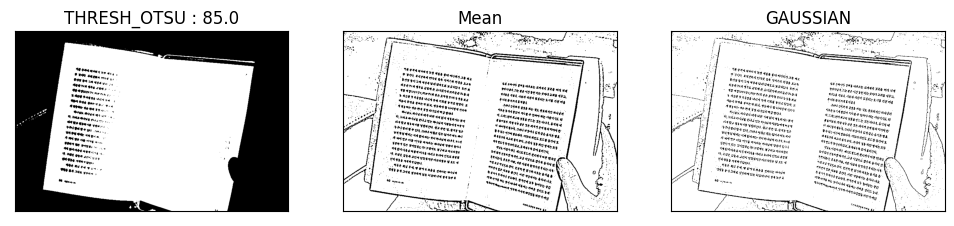

In [20]:
img_gray = cv2.imread("../OpenCV_data/image/threshold.PNG", cv2.IMREAD_GRAYSCALE)

# t : ostu로 정한 임계값
t, img_th = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 9 x 9
block_size = 9
# 결과값에서 빼는 값
C = 5

# 적응형 Threshold : Mean
img_th2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, block_size, C)

# 적응형 Threshold : Gaussian
img_th3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, block_size, C)

# figsize = (가로크기, 세로크기)
plt.figure(figsize=(12, 7))
plt.subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.title(f"THRESH_OTSU : {t}")
plt.imshow(img_th, cmap="gray")

plt.subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.title("Mean")
plt.imshow(img_th2, cmap="gray")

plt.subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.title("GAUSSIAN")
plt.imshow(img_th3, cmap="gray")

plt.show()